In [ ]:
!apt-get install -y tesseract-ocr
!pip install opencv-python pytesseract matplotlib pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,955 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

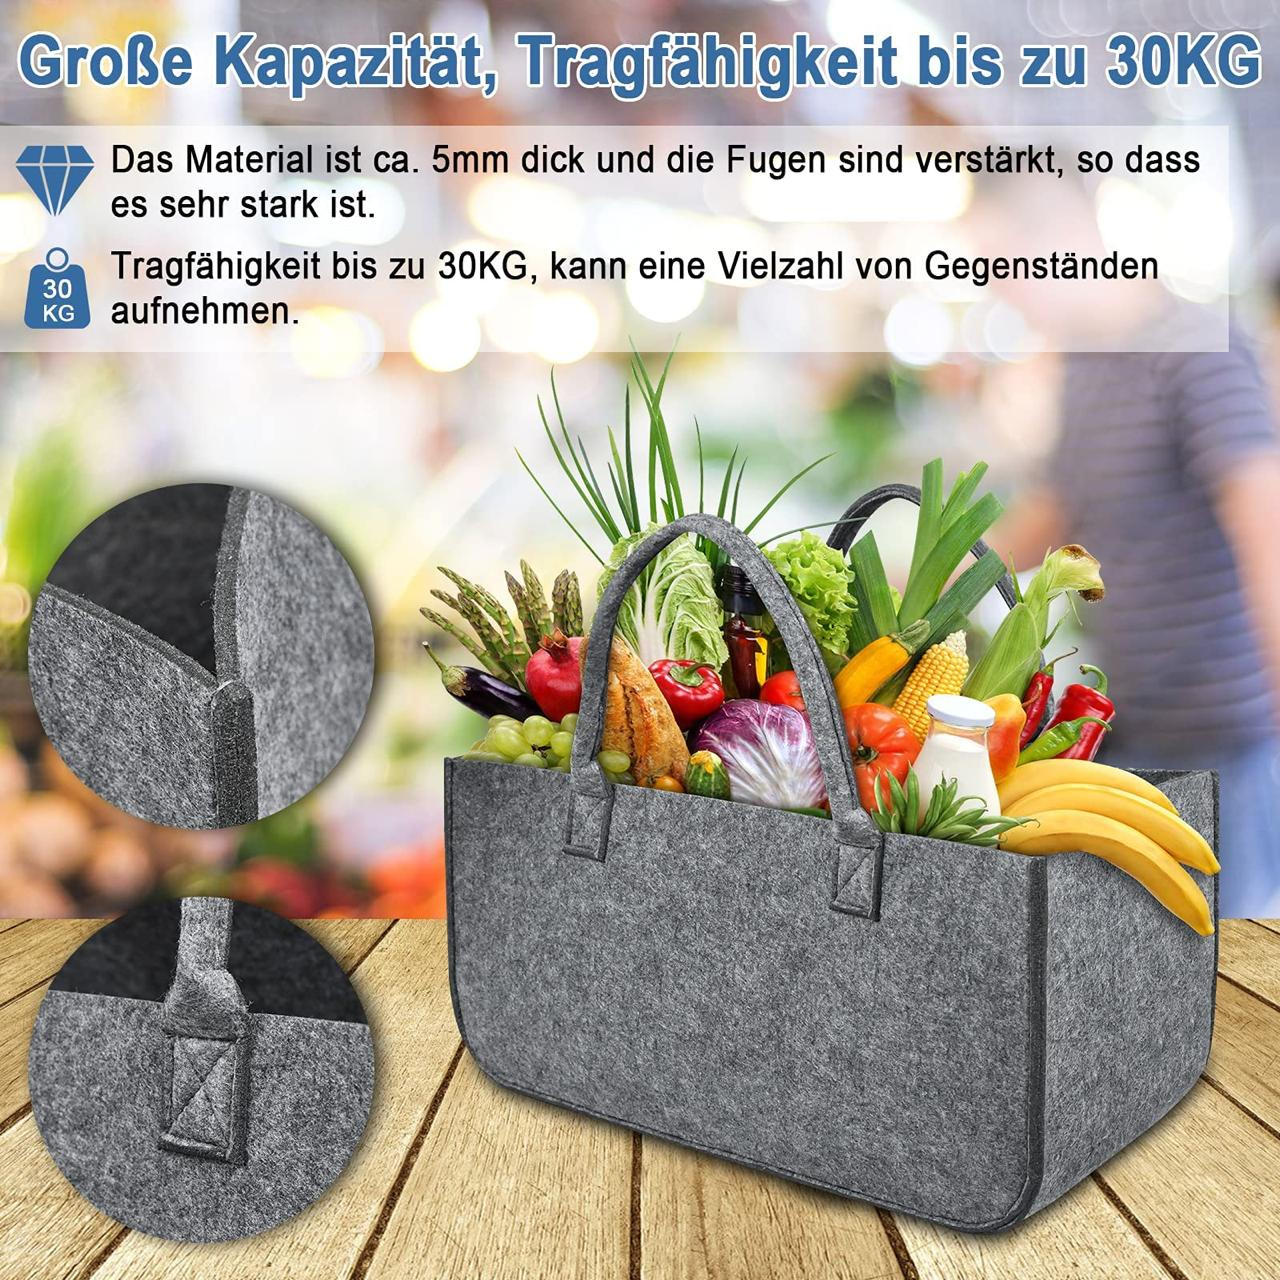

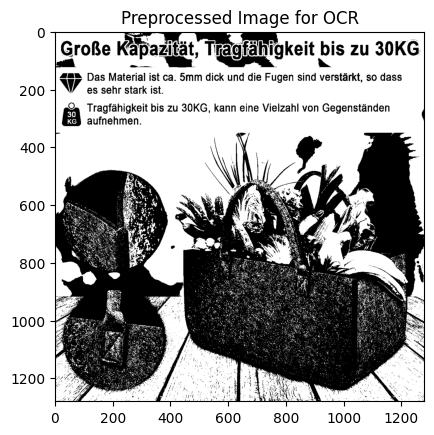

Extracted Text:
 Grobe Kapazitat, Thagfahigkeit bis zu 30KG

#™% Das Material ist ca. 5mm dick und die Fugen sind verstarkt, so dass

W es sehr stark ist.

Tragfahigkeit bis zu 30KG, kann eine Vielzahl von Gegenstanden (

)
& aufnehmen.

 

Extracted Entities: {'weight': '30 kg'}


In [ ]:
import cv2
import pytesseract
import re
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

# Step 1: Set the path of the already uploaded image (replace 'sample_image.jpg' with your actual image file)
uploaded_image_path = '/content/sample1.jpeg'  # Replace with your uploaded image name

# Step 2: Open and display the image
img = Image.open(uploaded_image_path)
display(img)

# Step 3: Preprocess the image for OCR
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title('Preprocessed Image for OCR')
    plt.show()
    return thresh

preprocessed_image = preprocess_image(uploaded_image_path)

# Step 4: Extract text using OCR
def extract_text_from_image(preprocessed_image):
    extracted_text = pytesseract.image_to_string(preprocessed_image)
    print("Extracted Text:\n", extracted_text)
    return extracted_text

extracted_text = extract_text_from_image(preprocessed_image)

# Step 5: Extract specific entities from the text
def extract_entities(text):
    entities = {}
    weight_match = re.search(r'(\d+\.?\d*)\s?kg', text, re.IGNORECASE)
    if weight_match:
        entities['weight'] = weight_match.group(1) + ' kg'
    voltage_match = re.search(r'(\d+\.?\d*)\s?v', text, re.IGNORECASE)
    if voltage_match:
        entities['voltage'] = voltage_match.group(1) + ' V'
    wattage_match = re.search(r'(\d+\.?\d*)\s?w', text, re.IGNORECASE)
    if wattage_match:
        entities['wattage'] = wattage_match.group(1) + ' W'
    dimensions_match = re.search(r'(\d+\.?\d*)\s?x\s?(\d+\.?\d*)\s?x\s?(\d+\.?\d*)\s?cm', text, re.IGNORECASE)
    if dimensions_match:
        entities['dimensions'] = f"{dimensions_match.group(1)} x {dimensions_match.group(2)} x {dimensions_match.group(3)} cm"
    return entities

entities = extract_entities(extracted_text)
print("Extracted Entities:", entities)